# EEG Project Data Exploration

EEG reflects the coordinated activity of millions of neurons near a non-invasive scalp electrode. Because these are scalp potentials, necessarily, they have relatively poor spatiotemporal resolution compared to other neural recording techniques. EEG is believed to be recording dipoles that are transmitted through the scalp.

For each subject, they record from 22 EEG electrodes while the user imagines performing one of four actions. The four motor imagery tasks were: imagination of movement of the left hand (class 1), right hand (class 2), both feet (class 3), and tongue (class 4). Therefore, this is a classification task (with four outcome classes), where the EEG is used to determine what action the subject was imagining.

The data was processed so that it is possible to load the data with numpy. Further, trials with NaN's have been removed.

In [1]:
# imports
import numpy as np
import aug
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
X_test = np.load("data/normalized/X_test.npy")
y_test = np.load("data/normalized/y_test.npy")
person_test = np.load("data/normalized/person_test.npy")

X_train_valid = np.load("data/normalized/X_train_valid.npy")
y_train_valid = np.load("data/normalized/y_train_valid.npy")
person_train_valid = np.load("data/normalized/person_train_valid.npy")

### Shape of Data

In [3]:
print('Training/Valid data shape: {}'.format(X_train_valid.shape))
print('Test data shape: {}'.format(X_test.shape))
print('Training/Valid target shape: {}'.format(y_train_valid.shape))
print('Test target shape: {}'.format(y_test.shape))
print('Person train/valid shape: {}'.format(person_train_valid.shape))
print('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 1000, 22)
Test data shape: (443, 1000, 22)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115,)
Person test shape: (443,)


This indicates that there are 2115 trials; each trial has corresponding EEG data from 22 electrodes over 1000 time bins. Please look at the dataset documentation to know more about the data. E.g., Table 2 lists what class labels (769, 770, 771, 772) correspond to. The person files correspond to the subject performing the task, ranging from 0-8 (inclusive) and may be useful should you want to see how well you can classify on individual subjects. In the original data / documentation, you may see that there are 25 channels. We have removed 3 of the channels (so that there are 22) because those 3 channels were for recording eye movements, not brain activity

In [4]:
print("Class values", np.unique(y_train_valid))
print("Number of trials in each class", np.bincount(y_train_valid - np.unique(y_train_valid)[0]))

Class values [769 770 771 772]
Number of trials in each class [529 513 543 530]


769 == Cue onset left (class 1)  
770 == Cue onset right (class 2)  
771 == Cue onset foot (class 3)  
772 == Cue onset tongue (class 4)  

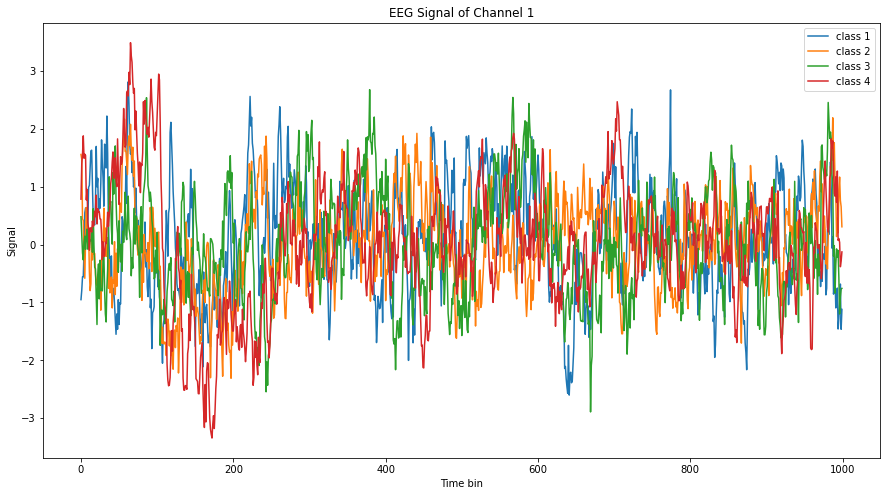

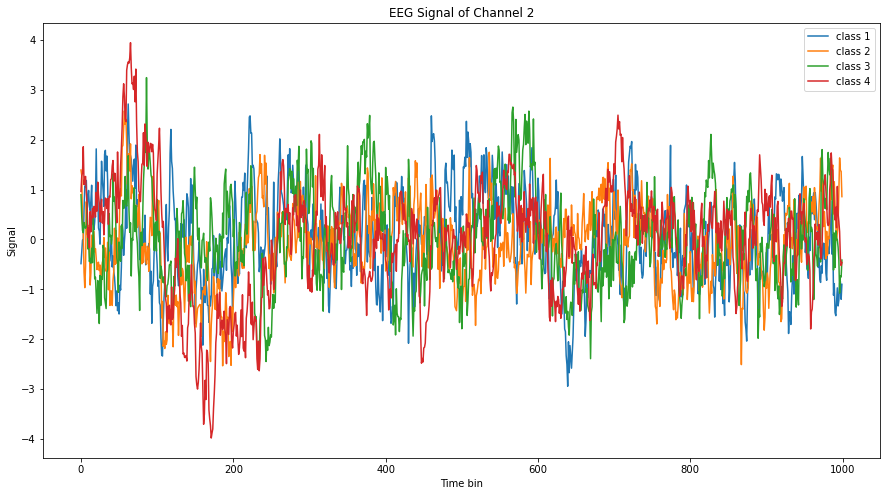

In [5]:
for i in range(2):
    plt.figure(figsize=(15, 8))
    plt.plot(X_train_valid[2, :, i], label='class 1') # trial 3, channel 1, across all time points 
    plt.plot(X_train_valid[7, :, i], label='class 2') # trial 8, channel 1, across all time points 
    plt.plot(X_train_valid[0, :, i], label='class 3') # trial 1, channel 1, across all time points 
    plt.plot(X_train_valid[1, :, i], label='class 4') # trial 2, channel 1, across all time points 
    plt.legend(loc="upper right")
    plt.title('EEG Signal of Channel %d' % (i+1))
    plt.xlabel('Time bin')
    plt.ylabel('Signal')
    plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2115/2115 [06:50<00:00,  5.15it/s]


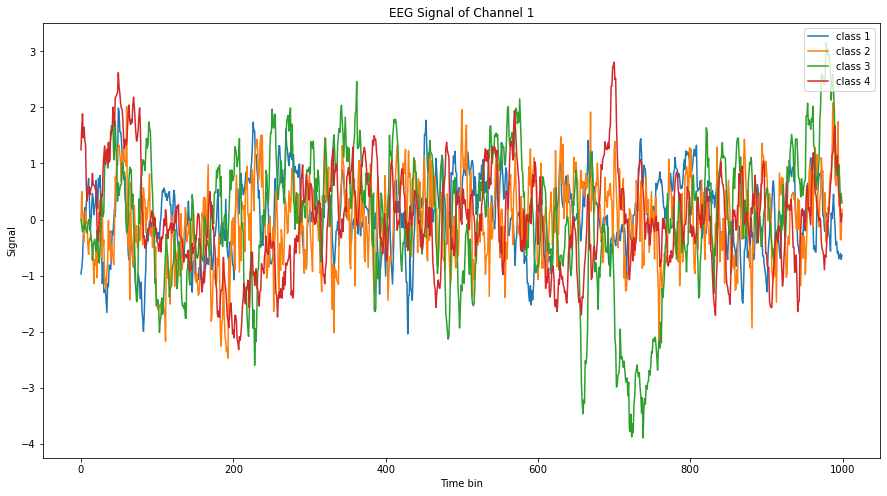

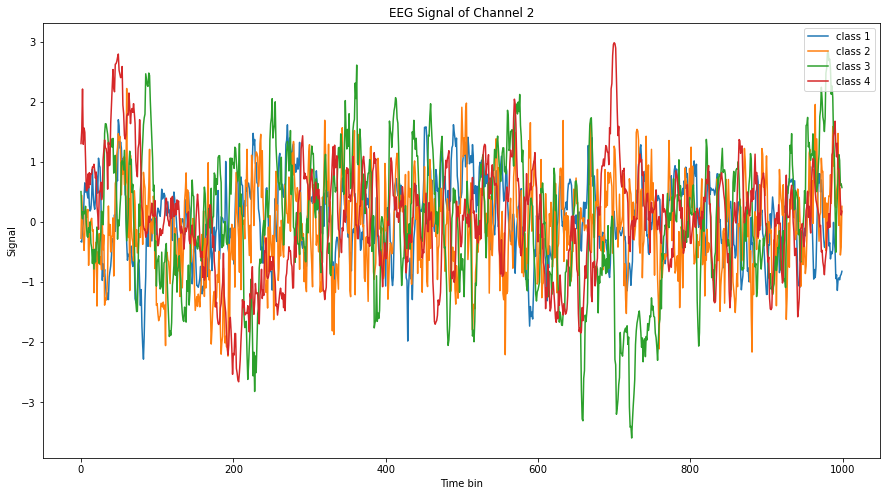

In [8]:
X_noisy = aug.spawner(X_train_valid, y_train_valid)

for i in range(2):
    plt.figure(figsize=(15, 8))
    plt.plot(X_noisy[2, :, i], label='class 1') # trial 3, channel 1, across all time points 
    plt.plot(X_noisy[7, :, i], label='class 2') # trial 8, channel 1, across all time points 
    plt.plot(X_noisy[0, :, i], label='class 3') # trial 1, channel 1, across all time points 
    plt.plot(X_noisy[1, :, i], label='class 4') # trial 2, channel 1, across all time points 
    plt.legend(loc="upper right")
    plt.title('EEG Signal of Channel %d' % (i+1))
    plt.xlabel('Time bin')
    plt.ylabel('Signal')
    plt.show()

Ideas to implement:  
- subsampling because nearby time points have similar values  
- trimming the last 600 time points away because there doesn't seem to be a difference in signal
- regularization
- larger convolutions are probably better 
- RNNs suffer from vanishing gradient problem, LSTM is solution to this - probably use bidirectional LSTM to encode temporal aspect of signal

Optimizer: Adam  
Loss Function: cross entropy loss
